In [5]:
# basic setup of the notebook
%pylab inline
from pprint import pprint # we use this to pretty print some stuff later

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit

Populating the interactive namespace from numpy and matplotlib


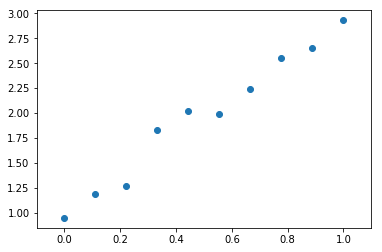

In [6]:
def line(x, a, b):
    return a + x * b

data_x = linspace(0, 1, 10)
# precomputed random numbers from a normal distribution
offsets = array([-0.49783783, -0.33041722, -1.71800806,  1.60229399,  1.36682387,
                 -1.15424221, -0.91425267, -0.03395604, -1.27611719, -0.7004073 ])
data_y = line(data_x, 1, 2) + 0.1 * offsets # generate some data points with random offsets
plot(data_x, data_y, "o")
xlim(-0.1, 1.1);

In [7]:
def least_squares(a, b):
    yvar = 0.01
    return sum((data_y - line(data_x, a, b)) ** 2 / yvar)

In [30]:
m = Minuit(least_squares, a=5, b=5, error_a=0.01, error_b=0.4, errordef=2.71)

In [31]:
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   5.000   |   0.010   |            |            |         |         |       |
| 1 | b    |    5.0    |    0.4    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [32]:
# migrad will not vary a, only b
m.migrad()

------------------------------------------------------------------
| FCN = 10.39                   |      Ncalls=32 (32 total)      |
| EDM = 4.6E-22 (Goal: 2.71E-05)|            up = 2.7            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |   0.99    |   0.10    |            |            |         |         |       |
| 1 | b    |   1.94    |   0.16    |            |            |         |         |       |
------------------------------------------------------------------------------------------

In [33]:
import numpy as np

def least_squares_np(par):  # par is a numpy array here 
    mu = np.polyval(par, data_x)  # for par = (a, b) this is a line
    yvar = 0.01
    return np.sum((data_y - mu) ** 2 / yvar)

In [34]:
from iminuit import minimize  # has same interface as scipy.optimize.minimize
minimize(least_squares_np, (5, 5))

      fun: 10.387011251394036
 hess_inv: array([[ 0.00981818, -0.00490909],
       [-0.00490909,  0.00345455]])
  message: 'Optimization terminated successfully.'
   minuit: <iminuit._libiminuit.Minuit object at 0x7f9c0d9e0588>
     nfev: 36
     njev: 0
  success: True
        x: array([1.9449447 , 0.99096644])

In [35]:
m.matrix(correlation=True)

-----------------
|   |    a    b |
-----------------
| a |  1.0 -0.8 |
| b | -0.8  1.0 |
-----------------

In [36]:
m.minos()

-------------------------------------------------
|        a        |            Valid            |
-------------------------------------------------
|      Error      |    -0.10     |     0.10     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------
-------------------------------------------------
|        b        |            Valid            |
-------------------------------------------------
|      Error      |    -0.16     |     0.16     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------

In [37]:
m.get_param_states()

------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | a    |    0.99   |    0.10   |   -0.10    |    0.10    |         |         |       |
| 1 | b    |    1.94   |    0.16   |   -0.16    |    0.16    |         |         |       |
------------------------------------------------------------------------------------------